# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [3]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [4]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [5]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

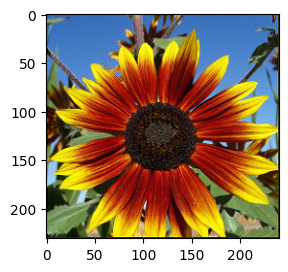

In [7]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

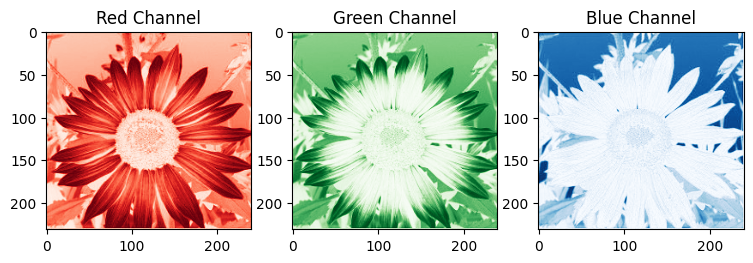

In [8]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

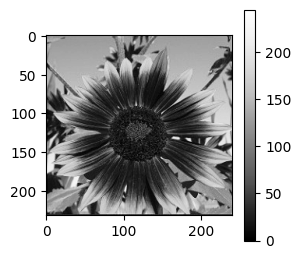

In [27]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:**
Можно, если не учитывая, что человеческий глаз немного по-разному воспринимает красный зеленый синий цвета, то среднее арифметические от R,G,B даст значение пикселя для черно-белой картинки.

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:**
флаг cmap отвечает за то, чтобы мы правильно конвертировали наш float-массив в пиксели нужного цвета, нам нужно черно-белая картинка, поэтому используем Greys_r(r означает, что мы обратную шкалу используем, то есть чтобы нулю соответствовал черный цвет, а не белый)

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [94]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

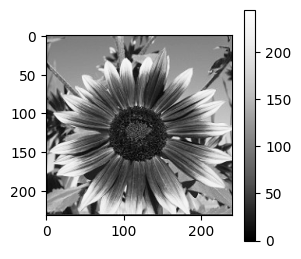

In [29]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [30]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [40]:
def convert_rgb_to_grayscale(image):
    grayscale_image = 0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]
    
    return np.uint8(grayscale_image)

In [41]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

AssertionError: 

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [42]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

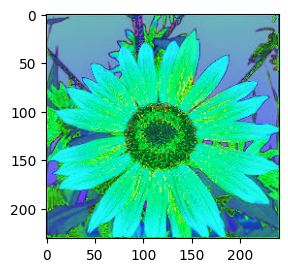

In [43]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

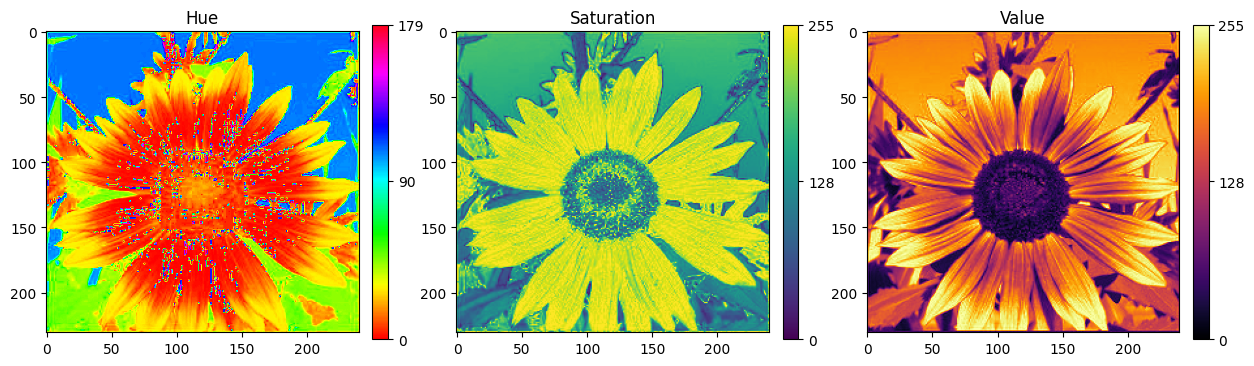

In [44]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

In [47]:
img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)

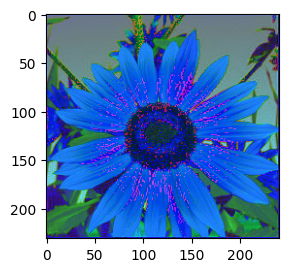

In [48]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hls);

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**
При вычислительно сложных задачах, переход в черно-белое пространство может облегчить объем вычислений. В задачах связанных с детекцией объектов по цвету можно использовать HSV пространство.

# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [49]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [50]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [51]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

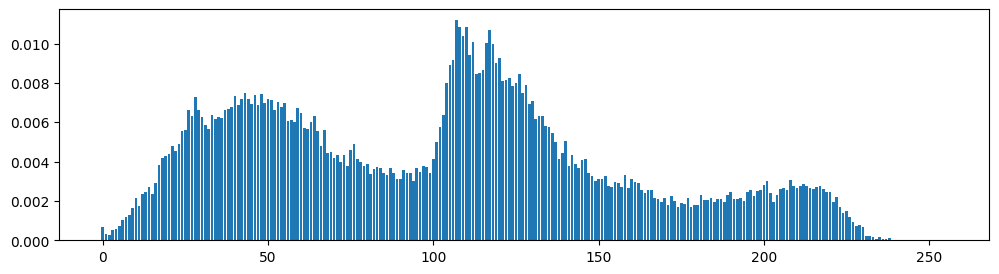

In [52]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [86]:
from collections import defaultdict

def compute_hist(img):
    hist = defaultdict(int)
    for pix in img.flatten():
        hist[pix] += 1
    answer = [0] * 256
    for key, value in hist.items():
        answer[key] = value
    return np.array(answer)

In [87]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

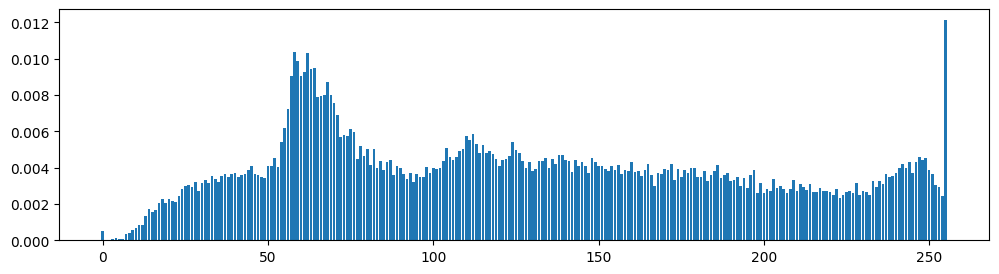

In [88]:
visualize_hist(hist_r)

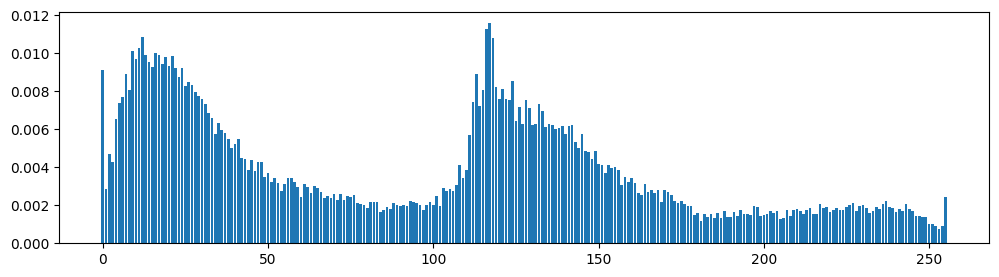

In [89]:
visualize_hist(hist_g)

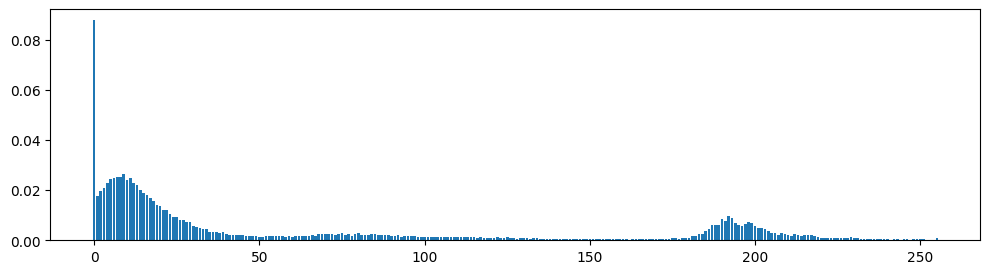

In [90]:
visualize_hist(hist_b)

In [92]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:**

можно понять сколько пикселей имеют определенный уровень яркости/интенсивности, эту информацию можно использовать чтобы определять наличие контрастных участков

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:**
При смене камеры камеры гистограмма может измениться в обе стороны, то есть может появиться больше темных пикселей или наоборот светлых, это зависит от настройки камеры. При смене освещения на более темное, то гистограмма должна быть более "горбатой" около нуля, в светлом освещении наоборот, гистограмма будет иметь участки высокой плотности правее. При смене сцены также могут наблюдаться изменения в обе стороны, все зависит от объектов на сцене, от яркости их цветов

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

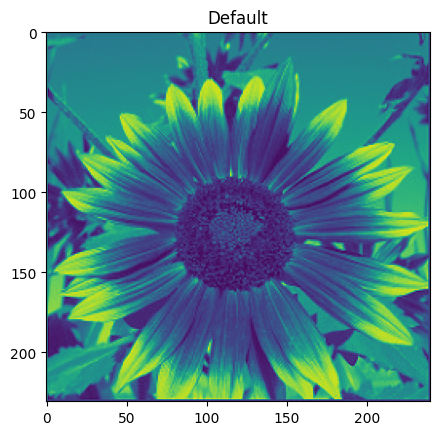

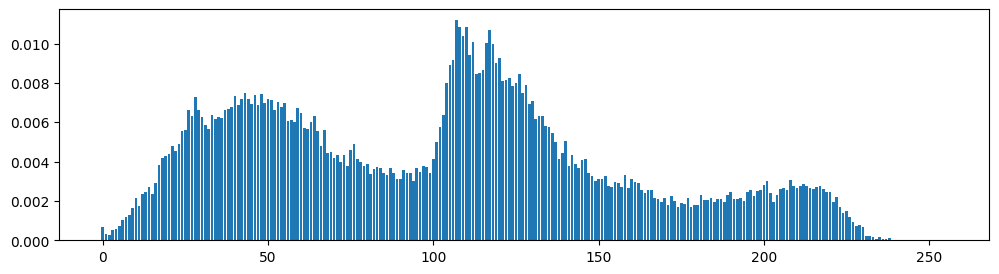

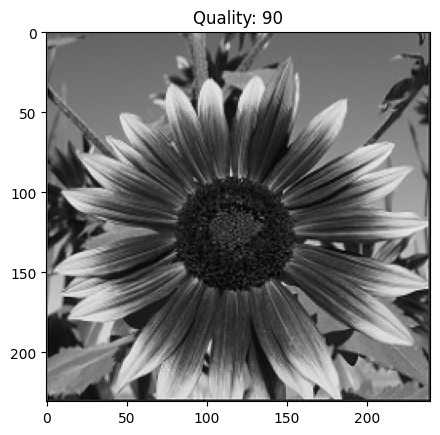

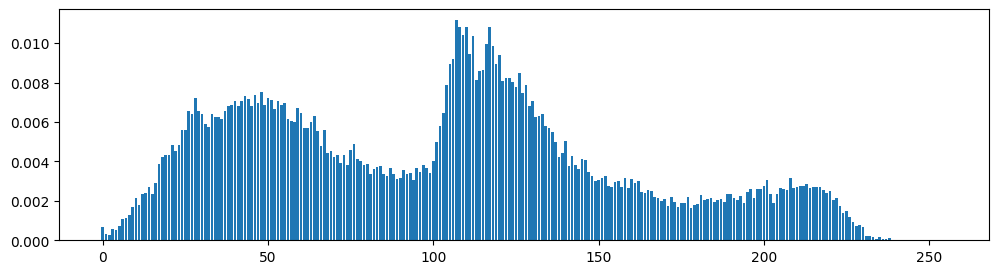

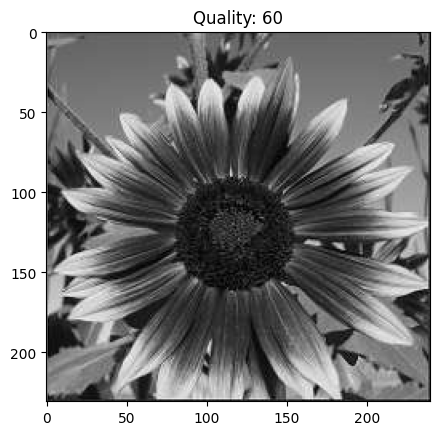

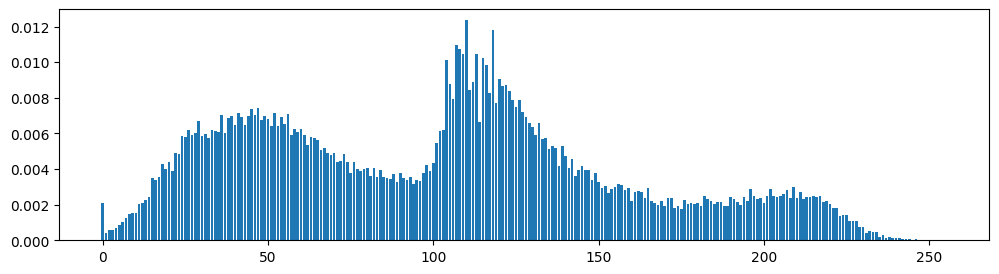

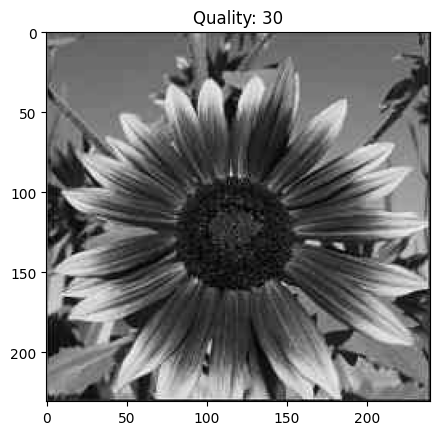

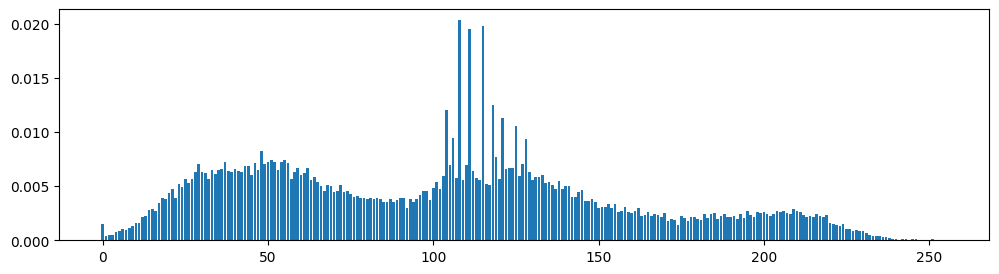

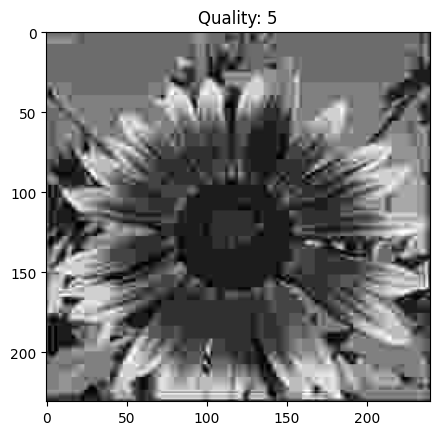

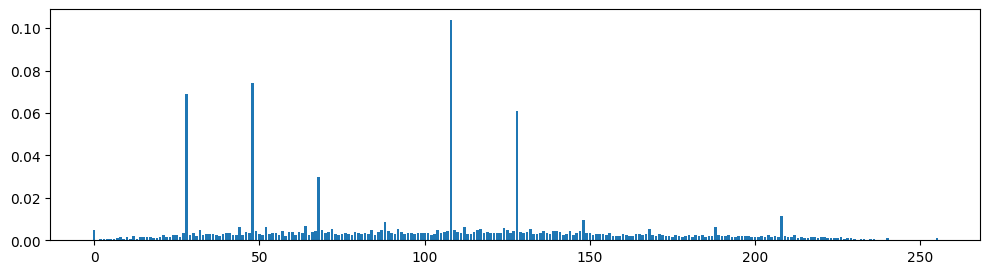

In [126]:
plt.imshow(img_gray)
plt.title('Default')
visualize_hist(compute_hist(img_gray))
plt.show()

for qual in [90, 60, 30, 5]:
    params = [int(cv2.IMWRITE_JPEG_QUALITY), qual]

    _, jpeg_image = cv2.imencode('.jpg', img_gray, params)

    decode = cv2.imdecode(jpeg_image, cv2.IMREAD_COLOR)

    plt.imshow(decode)
    plt.title(f'Quality: {qual}')
    visualize_hist(compute_hist(decode))
    plt.show()

При уменьшении степени сжатия гистограмма становится более равномерной, сохраняя лишь некоторые локальные значения высокой плотности.

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

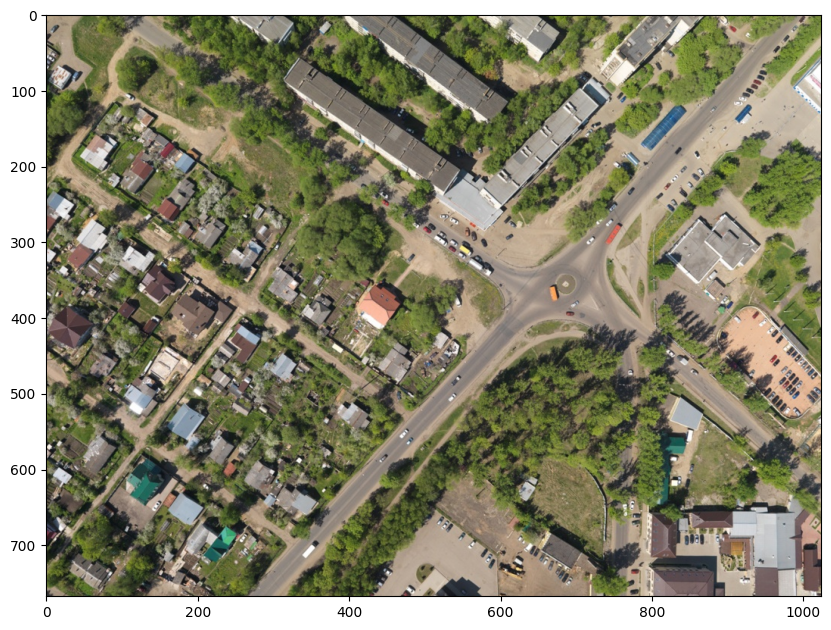

In [128]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

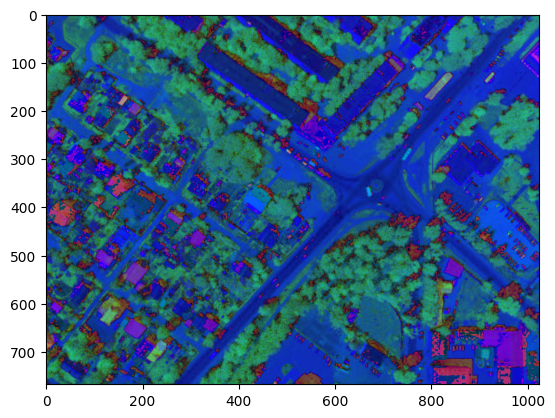

In [153]:
img_hsv = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv);

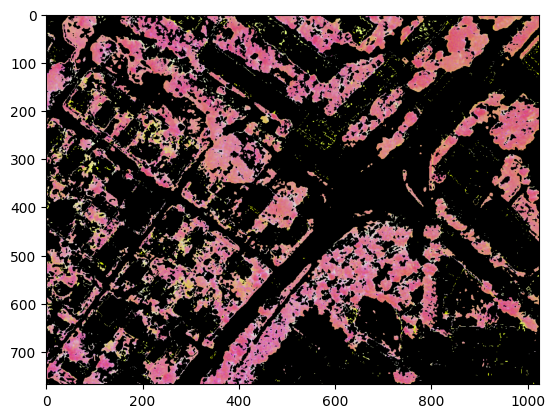

In [168]:
lower_green = np.array([30])  # Нижний предел
upper_green = np.array([40])  # Верхний предел

# Создание маски для зеленого цвета
mask = cv2.inRange(img_hsv[:, :, 0], lower_green, upper_green)

plt.imshow(img_hsv * mask[:, :, np.newaxis])

In [169]:
(mask != 0).sum() / (img_hsv.shape[0] * img_hsv.shape[1])

0.30974578857421875

Примерно 30 процентов изображения составляют зеленые насаждения

попробуем увеличить порог

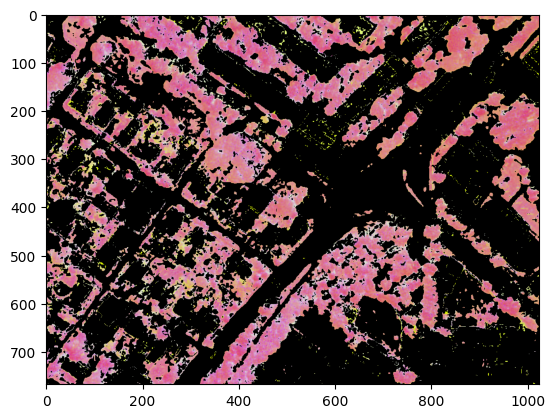

In [170]:
lower_green = np.array([30])  # Нижний предел
upper_green = np.array([45])  # Верхний предел

# Создание маски для зеленого цвета
mask = cv2.inRange(img_hsv[:, :, 0], lower_green, upper_green)

plt.imshow(img_hsv * mask[:, :, np.newaxis])

In [171]:
(mask != 0).sum() / (img_hsv.shape[0] * img_hsv.shape[1])

0.34864171346028644

Как мы видим, прирост почти на 5 процентов, так что погрешность наших вычислений достаточно большая

# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [239]:
class IntegralImage:
    def __init__(self, image):
        self.image = np.array(image)

        self.integral_image = np.zeros((self.image.shape[0] + 1, self.image.shape[1] + 1), dtype=np.float32)
        
        for y in range(1, self.image.shape[0] + 1):
            for x in range(1, self.image.shape[1] + 1):
                self.integral_image[y, x] = (self.image[y - 1, x - 1] +
                                         self.integral_image[y - 1, x] +
                                         self.integral_image[y, x - 1] -
                                         self.integral_image[y - 1, x - 1])

    def sum(self, x, y, w, h):
        return (self.integral_image[y+h, x+w] - self.integral_image[y+h, x]
                - self.integral_image[y, x+w] + self.integral_image[y, x])


In [240]:
I = IntegralImage(img_gray)

In [241]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**

в задачах сегментирования и детекции объектов по цвету

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**
двумерная динамика